# 1. Install and Import Dependencies 

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Admin/.cache\torch\hub\master.zip
YOLOv5  2022-11-24 Python-3.10.7 torch-1.13.0+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make Detection With Images

In [66]:
# img = 'https://www.thebeaverton.com/wp-content/uploads/2020/09/group-drinking.jpg'
img = 'https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/master/pass/highway-traffic.jpg'
# img = 'https://images.livemint.com/img/2022/08/04/600x338/PAKISTAN-ECONOMY-IMPORTS-1_1653543526549_1659575165352_1659575165352.jpg'

In [67]:
results = model(img)
results.print()

image 1/1: 768x1024 14 persons, 34 cars, 1 motorcycle, 1 truck
Speed: 1268.8ms pre-process, 2806.5ms inference, 8.8ms NMS per image at shape (1, 3, 480, 640)


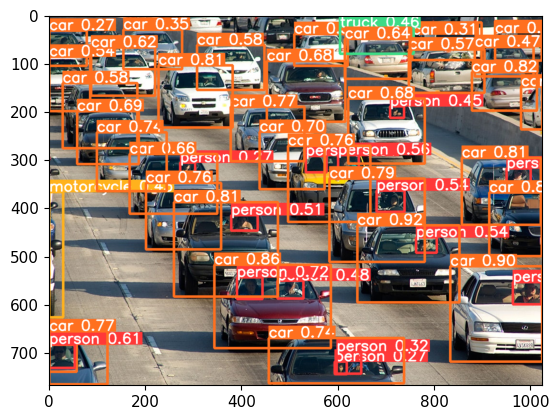

In [68]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [69]:
results.render()

[array([[[ 60,  70,  79],
         [ 56,  66,  75],
         [ 53,  63,  72],
         ...,
         [ 53,  66,  75],
         [ 55,  63,  74],
         [ 56,  65,  74]],
 
        [[ 58,  68,  77],
         [ 54,  64,  73],
         [ 50,  60,  69],
         ...,
         [ 53,  65,  77],
         [ 53,  63,  73],
         [ 52,  62,  71]],
 
        [[ 56,  66,  76],
         [ 53,  63,  73],
         [ 49,  59,  68],
         ...,
         [ 52,  64,  76],
         [ 50,  63,  72],
         [ 47,  60,  69]],
 
        ...,
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [161, 145, 129],
         [157, 144, 127],
         [156, 143, 126]],
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [157, 141, 125],
         [158, 142, 126],
         [160, 144, 128]],
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [151, 135, 119],
  

## Real Time Detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()